# CZ/CE 4041 Machine Learning
## Plant Seedling Classification [Kaggle] 
### Exploratory Data Analysis

### Team
* Dwivedee Lakshyajeet
* Gupta Jay
* Bansal Aditya
* Mantri Raghav
* Bhatia Ritik

> **Warning:** This notebook was created on the Kaggle platform where it fetches data from the Kaggle directories. It will not work by default on the Jupyter Notebook Platform.


In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-seedlings-classification/sample_submission.csv
/kaggle/input/plant-seedlings-classification/test/fd87b36ae.png
/kaggle/input/plant-seedlings-classification/test/0e8492cb1.png
/kaggle/input/plant-seedlings-classification/test/8d6acbe9b.png
/kaggle/input/plant-seedlings-classification/test/54b3afd58.png
/kaggle/input/plant-seedlings-classification/test/6049234e6.png
/kaggle/input/plant-seedlings-classification/test/82b5f4d33.png
/kaggle/input/plant-seedlings-classification/test/a0f37c726.png
/kaggle/input/plant-seedlings-classification/test/e0ec5b6a1.png
/kaggle/input/plant-seedlings-classification/test/1cfd91582.png
/kaggle/input/plant-seedlings-classification/test/456d507c0.png
/kaggle/input/plant-seedlings-classification/test/d6d31dcbe.png
/kaggle/input/plant-seedlings-classification/test/e1abb4ff9.png
/kaggle/input/plant-seedlings-classification/test/aa7d098d1.png
/kaggle/input/plant-seedlings-classification/test/e19673dc9.png
/kaggle/input/plant-seedlings-classif

/kaggle/input/plant-seedlings-classification/train/Charlock/3b2ae0151.png
/kaggle/input/plant-seedlings-classification/train/Charlock/32fc83278.png
/kaggle/input/plant-seedlings-classification/train/Charlock/02c95e601.png
/kaggle/input/plant-seedlings-classification/train/Charlock/d3228543a.png
/kaggle/input/plant-seedlings-classification/train/Charlock/51b461a5e.png
/kaggle/input/plant-seedlings-classification/train/Charlock/d633facf4.png
/kaggle/input/plant-seedlings-classification/train/Charlock/5283b8c96.png
/kaggle/input/plant-seedlings-classification/train/Charlock/9df7399d3.png
/kaggle/input/plant-seedlings-classification/train/Charlock/4cf7fd2d0.png
/kaggle/input/plant-seedlings-classification/train/Charlock/c7ac56c83.png
/kaggle/input/plant-seedlings-classification/train/Charlock/b50f12de9.png
/kaggle/input/plant-seedlings-classification/train/Charlock/42868a82d.png
/kaggle/input/plant-seedlings-classification/train/Charlock/10b7d4de4.png
/kaggle/input/plant-seedlings-classifi

/kaggle/input/plant-seedlings-classification/train/Maize/65ba0f497.png
/kaggle/input/plant-seedlings-classification/train/Maize/fc02b8466.png
/kaggle/input/plant-seedlings-classification/train/Maize/266211c3c.png
/kaggle/input/plant-seedlings-classification/train/Maize/988113525.png
/kaggle/input/plant-seedlings-classification/train/Maize/f2c22a1bf.png
/kaggle/input/plant-seedlings-classification/train/Maize/44d562432.png
/kaggle/input/plant-seedlings-classification/train/Maize/107bd7230.png
/kaggle/input/plant-seedlings-classification/train/Maize/06e1ee6e1.png
/kaggle/input/plant-seedlings-classification/train/Maize/e17f5daf0.png
/kaggle/input/plant-seedlings-classification/train/Maize/e43323e28.png
/kaggle/input/plant-seedlings-classification/train/Maize/489da47a5.png
/kaggle/input/plant-seedlings-classification/train/Maize/5a7d10c3d.png
/kaggle/input/plant-seedlings-classification/train/Maize/30f76315b.png
/kaggle/input/plant-seedlings-classification/train/Maize/649b7af36.png
/kaggl

/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/00d030ea0.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/85f33fcee.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/58e22d25a.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/7adff29ac.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/b8ac37dcd.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/f263c0f9f.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/0f2dbf503.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/6c7043cc5.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/afee78134.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/19f14f508.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/6226031d8.png

## Fetch Data from Kaggle's Directory

In [20]:
import os

data_directory = "../input/plant-seedlings-classification/"
train_data_directory = os.path.join(data_directory, "train")
test_data_directory = os.path.join(data_directory, "test")

In [21]:
import cv2
import numpy as np
from glob import glob

images = []
labels = []

"""
Loading data from our source, folder by folder. 
Every folder contains one type of plant seedling images.
We convert RGB images to a Grayscale vector using OpenCV and apply a mask on it. 
"""
for class_folder_name in os.listdir(train_data_directory):
    class_folder_path = os.path.join(train_data_directory, class_folder_name)
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        # Read the image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        # Resize the image to 45 x 45
        image = cv2.resize(image, (45,45))

        # Append image to the list of all images
        images.append(image)
        # Append lable to the list of all labels
        labels.append(class_folder_name)

# List of Image Arrays
images = np.array(images)

# List of Labels
labels = np.array(labels)

# Exploratory Data Analysis (EDA)

## Label Legend

In [22]:
import pprint as pp

# Dictionary to convert Labels to IDs
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
# Dictionary to convert IDs to Labels
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

print("Label Legend:")
print("-------------")
pp.pprint(label_to_id_dict)

Label Legend:
-------------
{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}


# General Image Information

Type of the image:  <class 'numpy.ndarray'>

Shape of the image: (4750, 45, 45, 3)
Image Hight: 45
Image Width: 45
Dimension of Image: 3

Label: Charlock
Label ID: 1


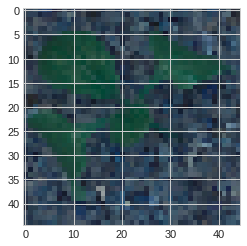

In [23]:
import matplotlib.pyplot as plt

# General Image Information
print('Type of the image: ',type(images))
print()
print('Shape of the image: {}'.format(images.shape))
print('Image Hight: {}'.format(images.shape[1]))
print('Image Width: {}'.format(images.shape[2]))
print('Dimension of Image: {}'.format(images.shape[3]))
print()

# Displaying a sample image from our data
plt.imshow(np.reshape(images[737], (45,45,3)))
print("Label:", labels[737])
print("Label ID:", label_to_id_dict[labels[737]])

In [24]:
from sklearn.preprocessing import StandardScaler

# Adding a label ID to our data using the dictionary 
label_ids = np.array([label_to_id_dict[x] for x in labels])

print("Number of Examples, Size of Example: ", end="")
print(images.shape)

Number of Examples, Size of Example: (4750, 45, 45, 3)


# Label Distribution

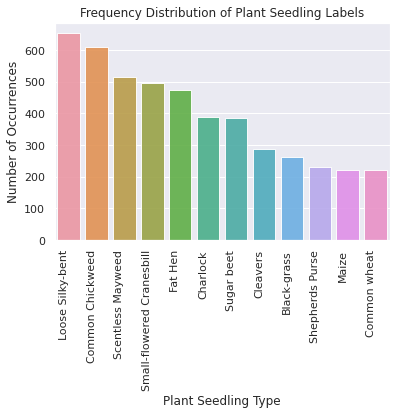

<Figure size 2160x1440 with 0 Axes>

In [25]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Converting to Pandas Dataframe for Matplotlib
df = pd.DataFrame(labels, columns = ['labels'])

species_count = df['labels'].value_counts()
sns.set(style="darkgrid")

plot = sns.barplot(species_count.index, species_count.values, alpha=0.9)
plt.title('Frequency Distribution of Plant Seedling Labels')

# Rotating X-Axis labels by 90 degrees for easy viewing
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Plant Seedling Type', fontsize=12)

# Saving Figure File
plt.figure(figsize=(30,20))
plt.savefig('labels.png')

# RGB Channel Analysis

### Red Channel

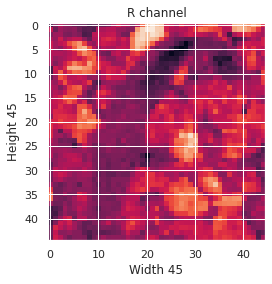

In [26]:
# Red Channel 
plt.title('R channel')
plt.ylabel('Height {}'.format(images.shape[1]))
plt.xlabel('Width {}'.format(images.shape[2]))
plt.imshow(images[734, : , : , 0])
plt.show()

### Green Channel

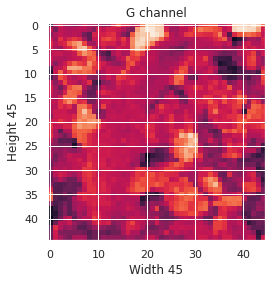

In [27]:
# Green Channel 
plt.title('G channel')
plt.ylabel('Height {}'.format(images.shape[1]))
plt.xlabel('Width {}'.format(images.shape[2]))
plt.imshow(images[734, : , : , 1])
plt.show()

### Blue Channel

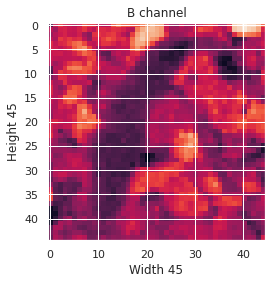

In [28]:
# Blue Channel
plt.title('B channel')
plt.ylabel('Height {}'.format(images.shape[1]))
plt.xlabel('Width {}'.format(images.shape[2]))
plt.imshow(images[734, : , : , 2])
plt.show()

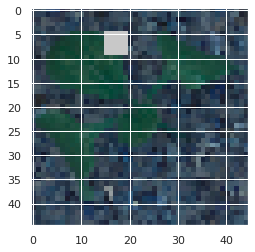

In [29]:
# Highlightning those parts for a sample image
# where the RGB intensity is maximum. 

img = images[737] # full intensity to those pixel's R channel
img[5:10 , 15:20 , [0,1,2] ] = 200

plt.figure()
plt.imshow(img)
plt.show()

# BGR Histograms

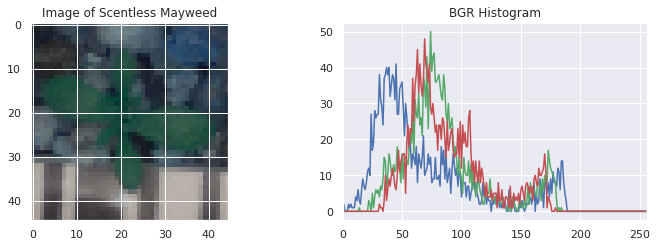

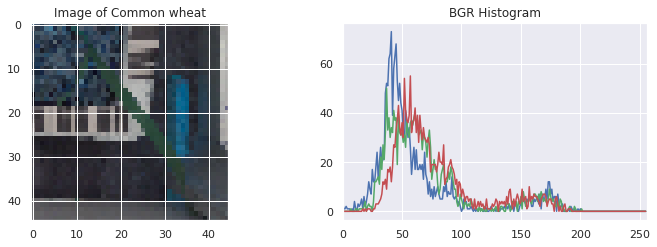

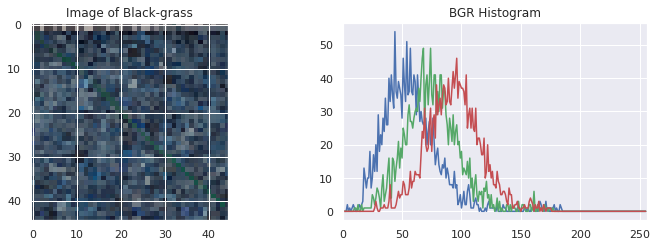

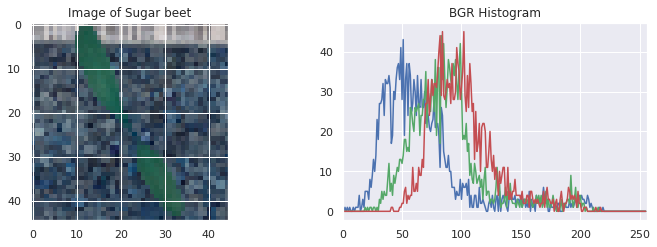

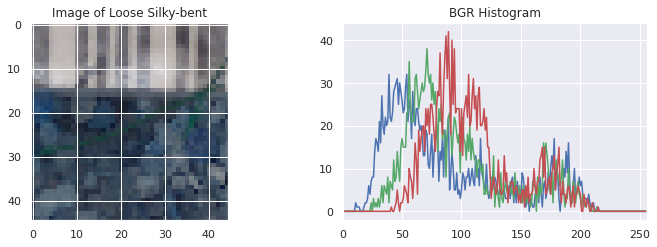

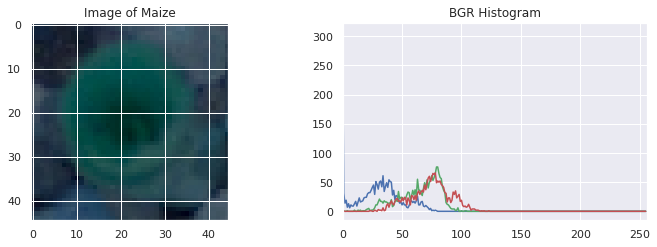

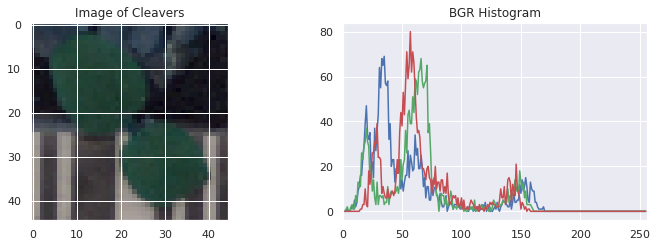

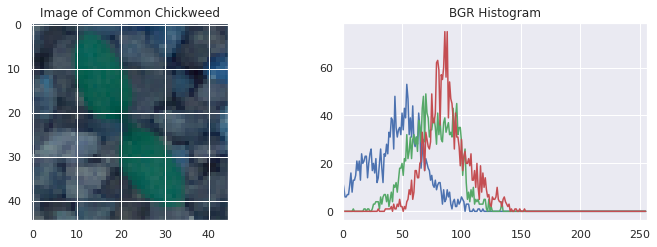

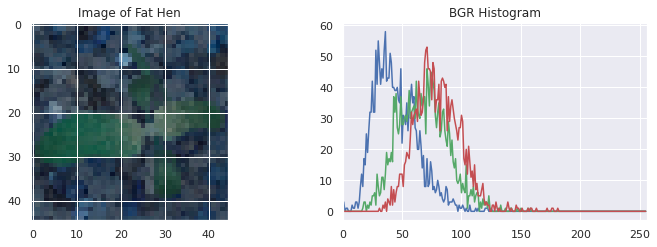

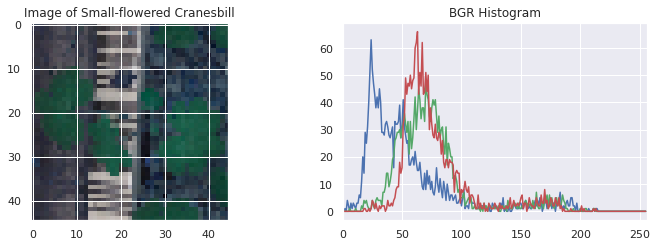

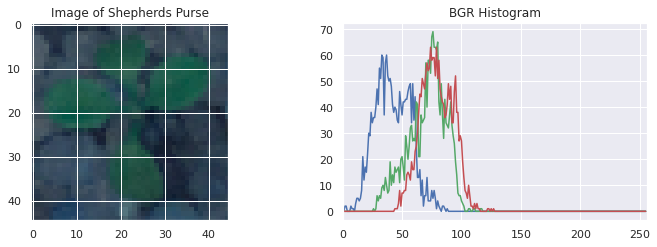

In [30]:
# Selecting images from each class
img_indexes = [100, 600, 1200, 1500, 2000, 2500, 2900, 3000, 4000, 4100, 4600]

for img_index in img_indexes:
    img = images[img_index]
    label = labels[img_index]

    fig = plt.figure(figsize=(12, 8))

    # Show Original Image
    fig.add_subplot(221)
    plt.title('Image of ' + label)
    plt.imshow(img)
    
    # Show BGR Histogrma
    fig.add_subplot(222)
    plt.title('BGR Histogram')

    color = ('b','g','r')

    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])

    plt.show() 

# Principal Component Analysis

In [31]:
from sklearn.decomposition import PCA

pixels = images.flatten().reshape(4750, 6075)

# We need 2 principal components.
pca = PCA(2)
converted_data = pca.fit_transform(pixels)
 
# Confirm the dimensions of the data
converted_data.shape

(4750, 2)

Label Legend:
-------------
{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}


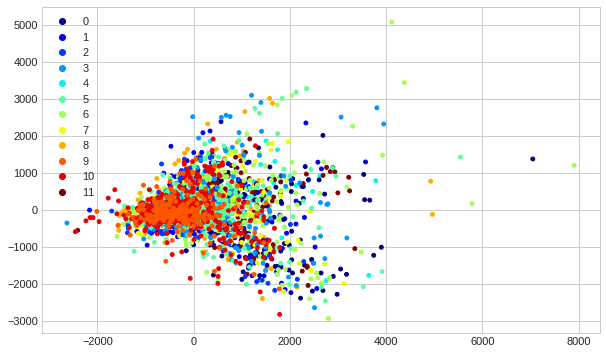

In [32]:
# Figure Styles
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 12)

# Scatter Plot
scatter = plt.scatter(converted_data[:, 0], converted_data[:, 1], c = label_ids,  s = 15, cmap = c_map)
labels = np.unique(label_ids)

# Differentiating the colors for each class
handles = [plt.Line2D([],[],marker="o", ls="",
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]

plt.legend(handles, labels)

# Printing the label legend for easy viewing
print("Label Legend:")
print("-------------")
pp.pprint(label_to_id_dict)

# Image Morphology

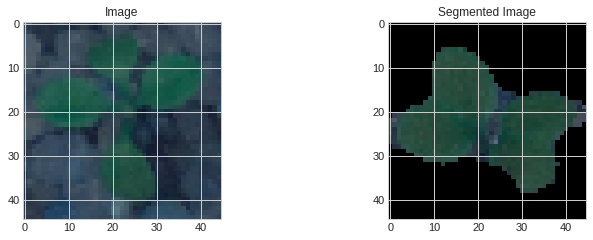

In [33]:
# References
#   - Gábor Vecsei (Kaggle)
#   - OpenCV Docs (https://docs.opencv.org/3.4/d7/d37/tutorial_mat_mask_operations.html)

"""
Creating a mask to extract the relevant features from the plant images.

    Args:
        - image: OpenCV Image 
"""
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    sensitivity = 35
    
    # Get pixels from image in the following (Hue, Saturation, Lightness) range
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

"""
Applying the mask on the image.

    Args:
        - image: OpenCV Image
"""
def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output


fig = plt.figure(figsize=(12, 8))

img = images[766]

# show original image
fig.add_subplot(221)
plt.title('Image')
plt.imshow(img)

# show segmented image
segmented_image = segment_plant(img)
fig.add_subplot(222)
plt.title('Segmented Image')
plt.imshow(segmented_image)